# Analyze regression results

In [7]:
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../lib")
from ScaleRegressor import ScaleRegressor
from ExtraFM import FMRegressor

In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def rmse(true,pred):
    return mean_squared_error(true, pred,squared=False)

#res_dict=all_res_dict["0-PLS-vec-(ScaleRegressor()"]

def parse_error(all_res_dict):

    all_err_dict={}
    for k in all_res_dict:
        res_dict=all_res_dict[k]
        err_dict={}

        te_y=res_dict["te_y"]
        tr_y=res_dict["tr_y"]
        p_te_y=res_dict["p_te_y"]
        p_tr_y= res_dict["p_tr_y"]
        p_tr_y= res_dict["p_tr_y"]
        extra_ids=res_dict["extra_ids"]
        inner_ids=res_dict["inner_ids"]

        err_dict["extra_MAE"]=mean_absolute_error(te_y[extra_ids],p_te_y[extra_ids])
        err_dict["inner_MAE"]=mean_absolute_error(te_y[inner_ids],p_te_y[inner_ids])
        err_dict["train_MAE"]=mean_absolute_error(tr_y,p_tr_y)
        err_dict["extra_RMSE"]=rmse(te_y[extra_ids],p_te_y[extra_ids])
        err_dict["inner_RMSE"]=rmse(te_y[inner_ids],p_te_y[inner_ids])
        err_dict["train_RMSE"]=rmse(tr_y,p_tr_y)

        cond=k.split("-")
        err_dict["Trial"]=cond[0]
        err_dict["Model"]=cond[1]
        err_dict["Mode"]=cond[2]
        all_err_dict[k]=err_dict

    return all_err_dict

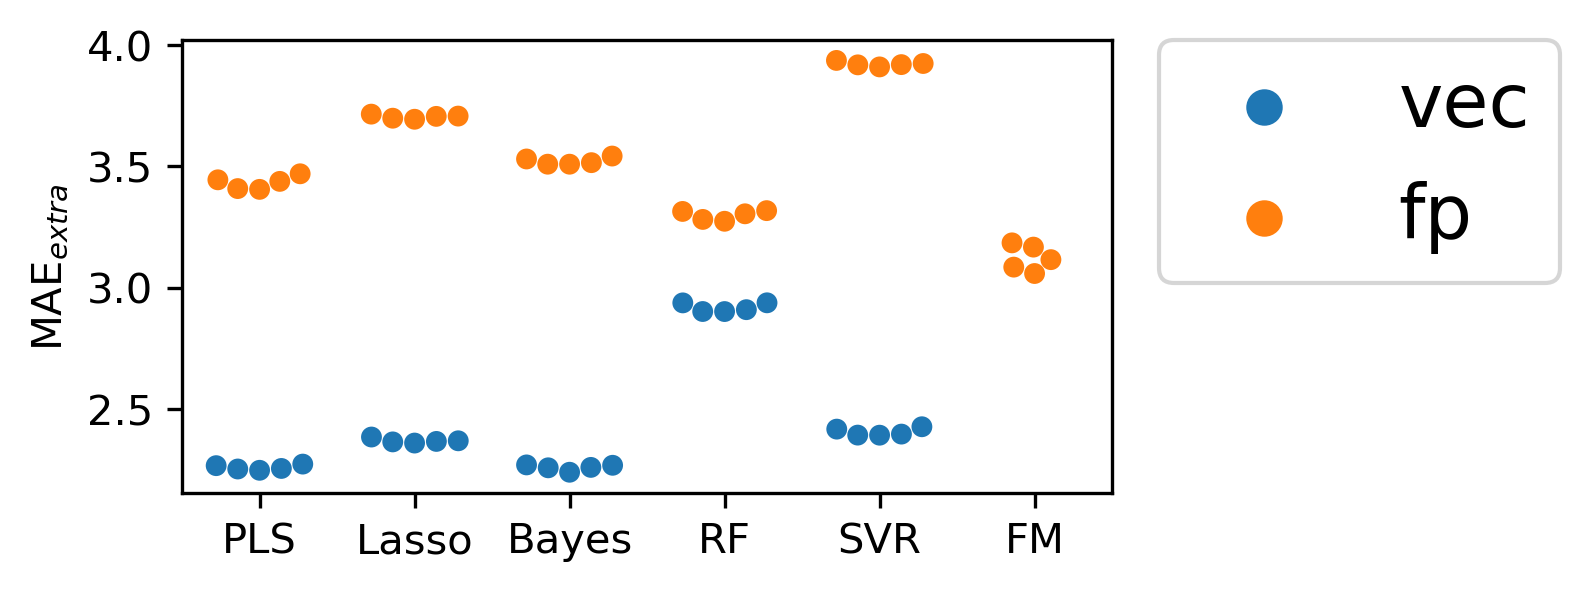

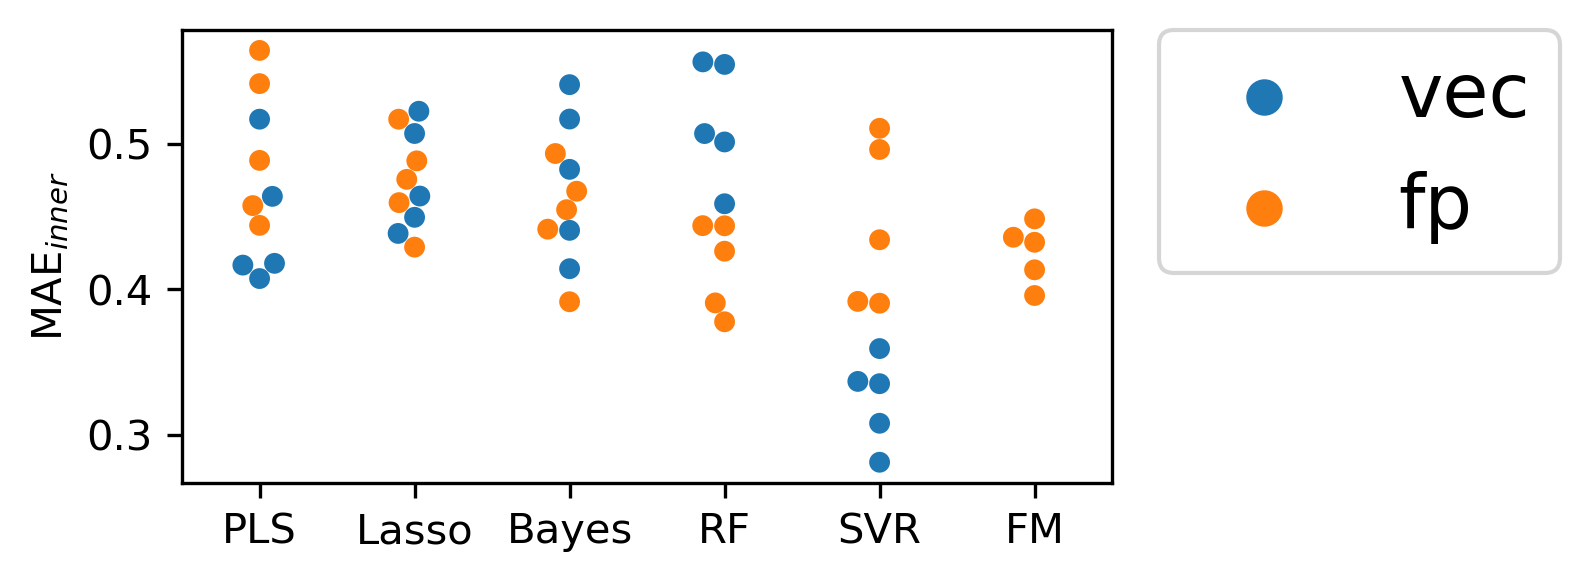

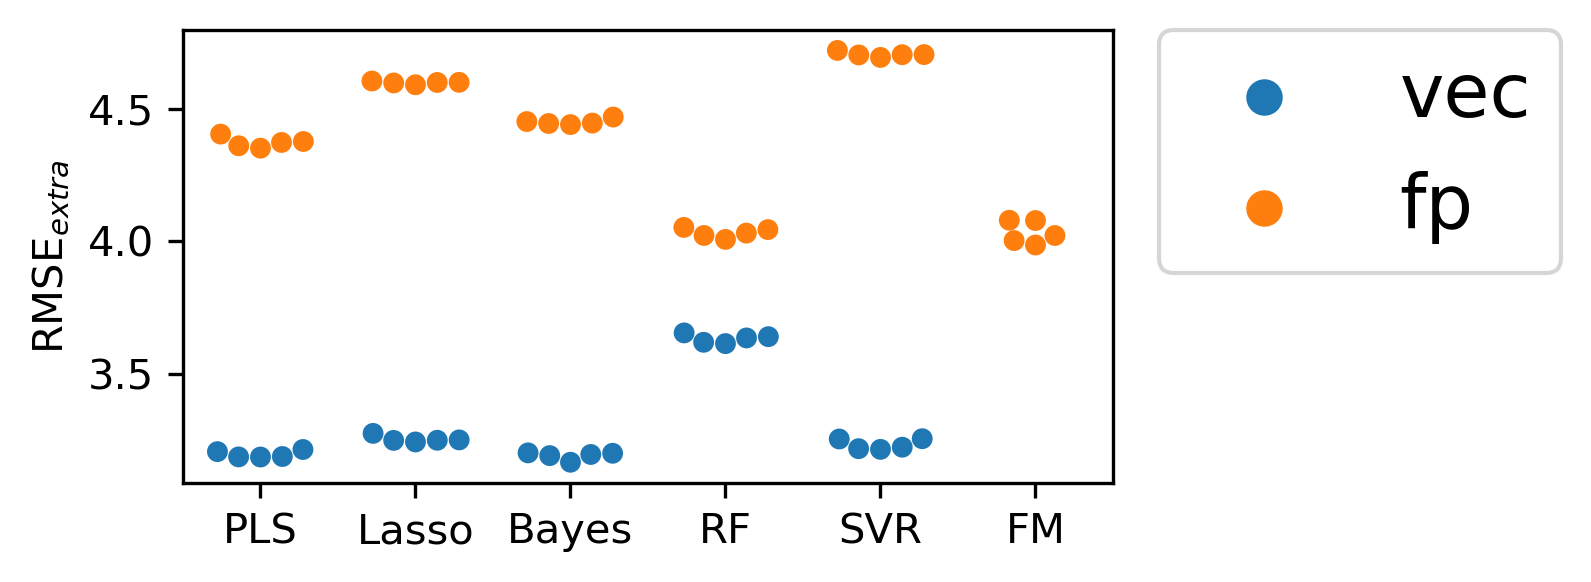

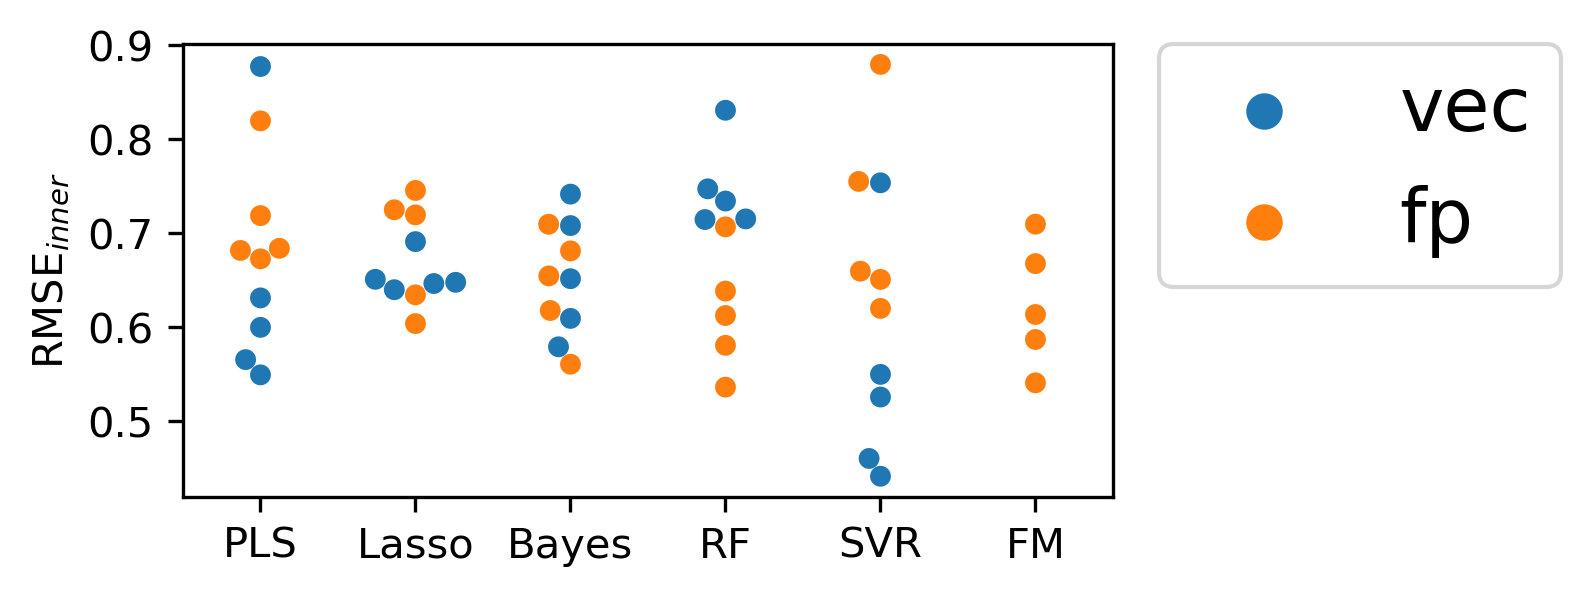

In [9]:

path="res/20220530/MP.bin"
path="res/20220530/TPSA.bin"
path="res/20220530/MolLogP.bin"

all_res_dict=joblib.load(path)
all_err_dict=parse_error(all_res_dict)
df=pd.DataFrame.from_dict(all_err_dict).T

for y_label in ["extra_MAE","inner_MAE","extra_RMSE","inner_RMSE"]:

    plt.figure(figsize=(4, 2),dpi=300)
    sns.swarmplot(x="Model", y=y_label, data=df,hue="Mode")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.xlabel("")

    l1,l2=y_label.split("_")
    show_label=l2+"$_{"+l1+"}$"

    plt.ylabel(show_label)

